In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

In [5]:
df = pd.read_csv("/content/AtlasofSurveillance.csv")

In [6]:
columns_to_fill_unknown = ['City', 'State', 'Link 1 Source']
df[columns_to_fill_unknown] = df[columns_to_fill_unknown].apply(lambda x: np.where(x.isnull(), 'Unknown', x))

columns_to_replace_not_available = ['Link 1', 'Link 2', 'Link 3']
df[columns_to_replace_not_available] = df[columns_to_replace_not_available].fillna('Not Available')

df['Link 2 Source'] = np.where(df['Link 2 Source'].isnull(), 'Not Available', df['Link 2 Source'])
df['Link 3 Source'] = np.where(df['Link 3 Source'].isnull(), 'Not Available', df['Link 3 Source'])

date_columns = ['Link 1 Date', 'Link 2 Date', 'Link 3 Date']
df[date_columns] = df[date_columns].apply(lambda x: np.where(x.isnull(), 'Unknown', x))

columns_to_drop = ['Link 1 Type', 'Link 2 Type', 'Link 3 Type']
df = df.drop(columns=columns_to_drop)

In [7]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head(3)

First few rows of the dataset:


,AOSNUMBER,City,County,State,Agency,Type of LEA,Summary,Type of Juris,Technology,Vendor,Link 1,Link 1 Source,Link 1 Date,Link 2,Link 2 Source,Link 2 Date,Link 3,Link 3 Source,Link 3 Date
0,1,Woodstock,Shenandoah County,VA,Woodstock Police Department,Police,The Woodstock Police Department has used body-...,Municipal,Body-worn Cameras,VML Insurance Programs,https://www.vrsa.us/body-camera-footage-corrob...,Virgina Risk Sharing Association,12/27/2012,Not Available,Not Available,Unknown,Not Available,Not Available,Unknown
1,2,Rockford,Ogle County,IL,Rockford Police Department,Police,"The Rockford Police Department spent $310,000 ...",Municipal,Gunshot Detection,ShotSpotter,https://www.rrstar.com/news/20181006/less-gunf...,RR Star,10/6/2018,Not Available,Not Available,Unknown,Not Available,Not Available,Unknown
2,3,Atlanta,DeKalb County,GA,Atlanta Police Department,Police,The Atlanta Police Department began using Shot...,Municipal,Gunshot Detection,ShotSpotter,https://www.wsbtv.com/news/local/atlanta/atlan...,WSB TV,11/16/2018,https://www.atlantapd.org/Home/ShowDocument?id...,Atlanta Police Department,9/15/2018,Not Available,Not Available,Unknown


In [8]:
print("Summary statistics for numerical columns:")
df.describe()

Summary statistics for numerical columns:


,AOSNUMBER,City,County,State,Agency,Type of LEA,Summary,Type of Juris,Technology,Vendor,Link 1,Link 1 Source,Link 1 Date,Link 2,Link 2 Source,Link 2 Date,Link 3,Link 3 Source,Link 3 Date
count,5495,5495,5435,5495,5495,5495,5495,5495,5495,3616,5495,5495,5495,5495,5495,5495,5495,5495,5495
unique,5495,2681,1013,56,3360,33,5424,16,12,131,1484,972,864,654,442,405,282,261,175
top,1,Tallahassee,Orange County,CA,Springfield Police Department,Police,The Maryland State Police and police departmen...,Municipal,Body-worn Cameras,Ring,https://www.google.com/maps/d/viewer?mid=1eYVD...,Ring,2020,Not Available,Not Available,Unknown,Not Available,Not Available,Unknown
freq,1,21,101,711,13,4037,6,3798,1339,1330,1331,1331,1087,3966,3994,4041,4629,4636,4716


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495 entries, 0 to 5494
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AOSNUMBER      5495 non-null   object
 1   City           5495 non-null   object
 2   County         5435 non-null   object
 3   State          5495 non-null   object
 4   Agency         5495 non-null   object
 5   Type of LEA    5495 non-null   object
 6   Summary        5495 non-null   object
 7   Type of Juris  5495 non-null   object
 8   Technology     5495 non-null   object
 9   Vendor         3616 non-null   object
 10  Link 1         5495 non-null   object
 11  Link 1 Source  5495 non-null   object
 12  Link 1 Date    5495 non-null   object
 13  Link 2         5495 non-null   object
 14  Link 2 Source  5495 non-null   object
 15  Link 2 Date    5495 non-null   object
 16  Link 3         5495 non-null   object
 17  Link 3 Source  5495 non-null   object
 18  Link 3 Date    5495 non-null

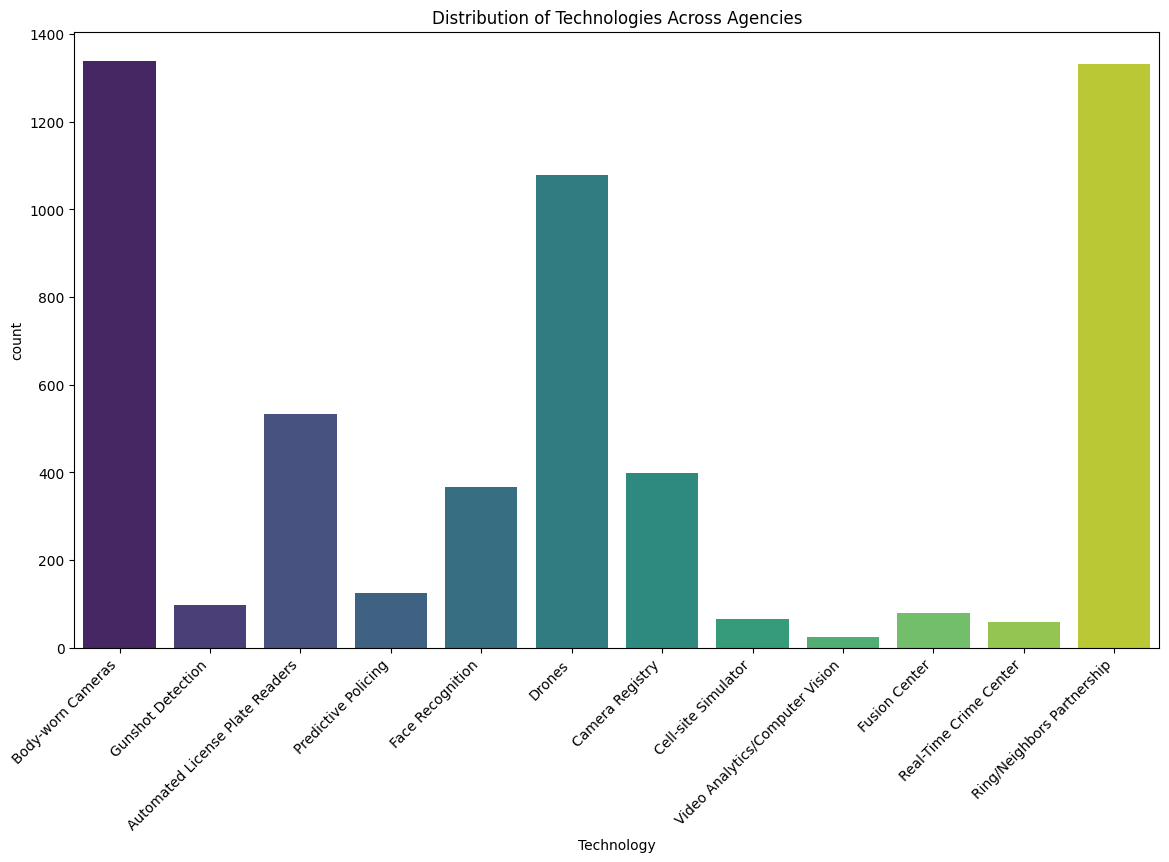

In [10]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Technology', data=df, hue='Technology', palette='viridis', legend=False)
plt.title('Distribution of Technologies Across Agencies')
plt.xticks(rotation=45, ha='right')
plt.show()


In [3]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=84fd3bfa648954f02ec4afa8c533414fe7c33a3000542d798e6ce984c0ccfbee
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [11]:
spark = SparkSession.builder.appName("LawEnforcementAnalysis").getOrCreate()

spark_df = spark.createDataFrame(df)
spark_df.createOrReplaceTempView("law_enforcement_data")
technology_distribution = spark.sql("""
    SELECT Agency, Technology, COUNT(*) AS Count
    FROM law_enforcement_data
    GROUP BY Agency, Technology
    ORDER BY Count DESC
""")
technology_distribution.show()


+--------------------+--------------------+-----+
|              Agency|          Technology|Count|
+--------------------+--------------------+-----+
|Jackson County Sh...|              Drones|    6|
|Douglas County Sh...|              Drones|    5|
|Montgomery County...|              Drones|    5|
|Franklin County S...|              Drones|    5|
|Jefferson County ...|              Drones|    4|
|Washington County...|              Drones|    4|
|Franklin Police D...|              Drones|    4|
|Jefferson County ...|   Body-worn Cameras|    4|
|Springfield Polic...|Ring/Neighbors Pa...|    4|
|Florence Police D...|   Body-worn Cameras|    3|
|Newark Police Dep...|   Body-worn Cameras|    3|
|Shelby County She...|              Drones|    3|
|Dallas Police Dep...|     Camera Registry|    3|
|Calhoun County Sh...|   Body-worn Cameras|    3|
|Lawrence Police D...|   Body-worn Cameras|    3|
|Fayetteville Poli...|   Body-worn Cameras|    3|
|Union County Sher...|   Body-worn Cameras|    3|


In [12]:
top_agencies = spark.sql("""
    SELECT Agency, COUNT(DISTINCT Technology) AS TechnologiesCount
    FROM law_enforcement_data
    GROUP BY Agency
    ORDER BY TechnologiesCount DESC
    LIMIT 10
""")
top_agencies.show()


+--------------------+-----------------+
|              Agency|TechnologiesCount|
+--------------------+-----------------+
|New York Police D...|                9|
|Tampa Police Depa...|                7|
|Las Vegas Metropo...|                7|
|Miami Gardens Pol...|                7|
|Miami Police Depa...|                7|
|Springfield Polic...|                7|
|Atlanta Police De...|                7|
|Rochester Police ...|                7|
|Los Angeles Count...|                6|
|Montgomery County...|                6|
+--------------------+-----------------+



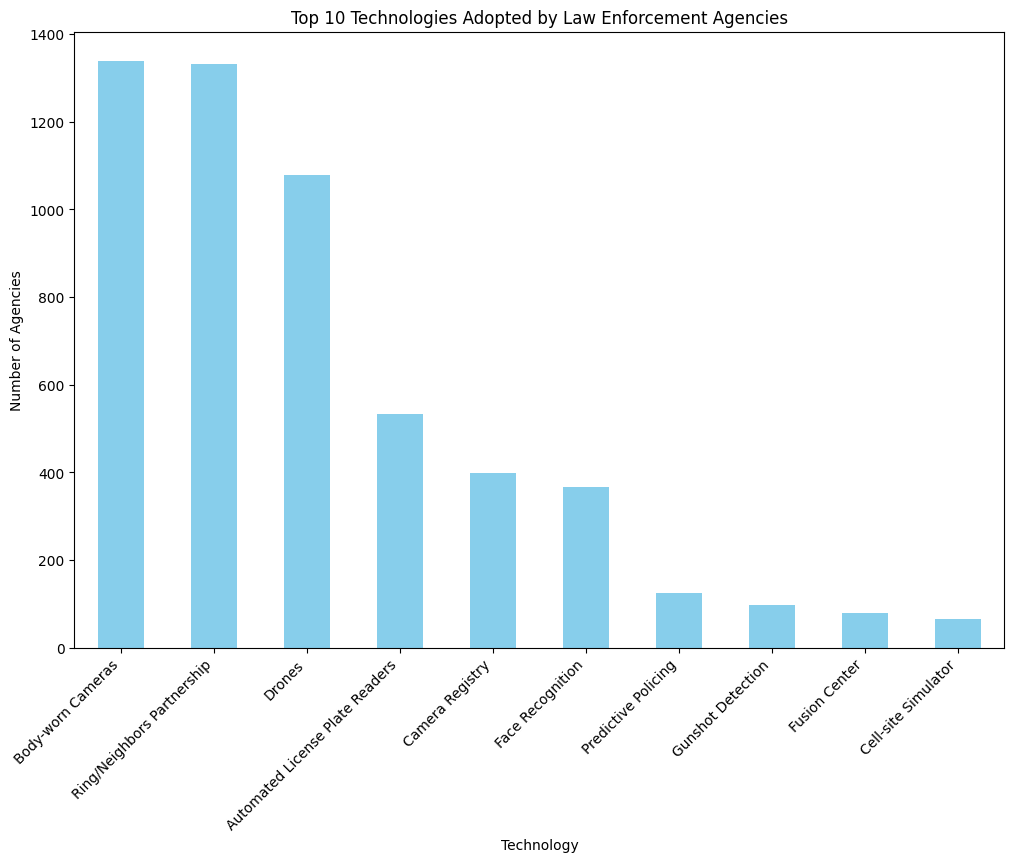

In [13]:
technologies_count = df['Technology'].value_counts()

top_agencies = technologies_count.head(10)

plt.figure(figsize=(12, 8))
top_agencies.plot(kind='bar', color='skyblue')
plt.xlabel('Technology')
plt.ylabel('Number of Agencies')
plt.title('Top 10 Technologies Adopted by Law Enforcement Agencies')
plt.xticks(rotation=45, ha='right')
plt.show()


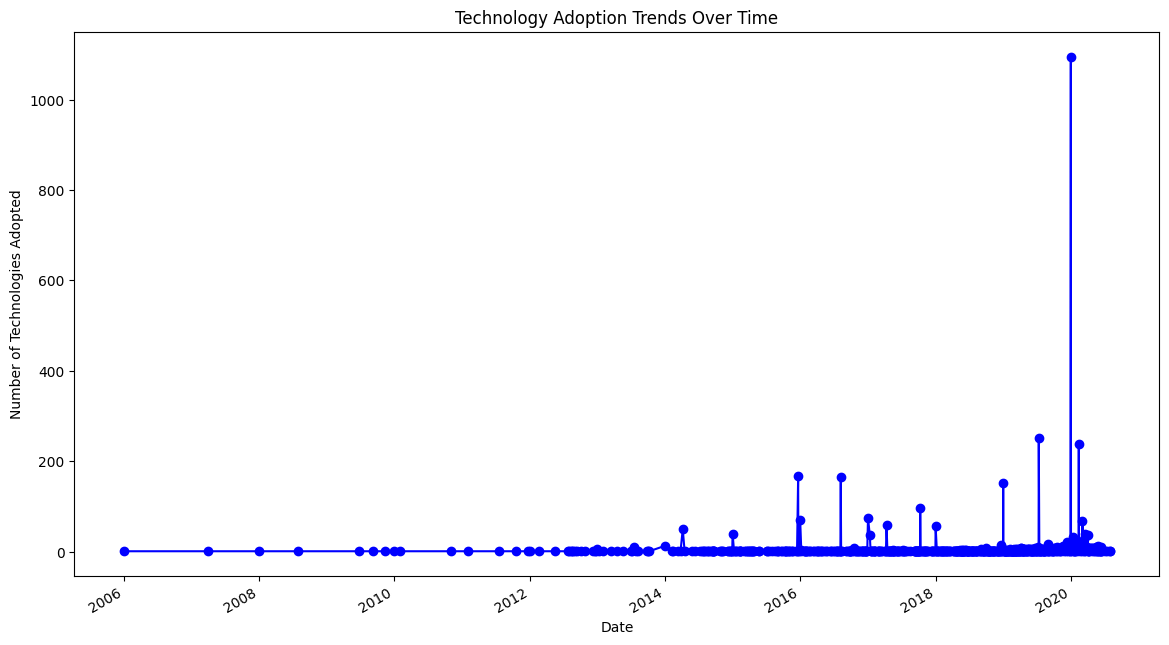

In [14]:
date_columns = ['Link 1 Date', 'Link 2 Date', 'Link 3 Date']
df['Combined Date'] = pd.to_datetime(df[date_columns].stack(), errors='coerce').unstack().max(axis=1)
technology_trends = df.groupby('Combined Date')['Technology'].count()

plt.figure(figsize=(14, 8))
technology_trends.plot(kind='line', marker='o', color='b')
plt.title('Technology Adoption Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Technologies Adopted')
plt.show()


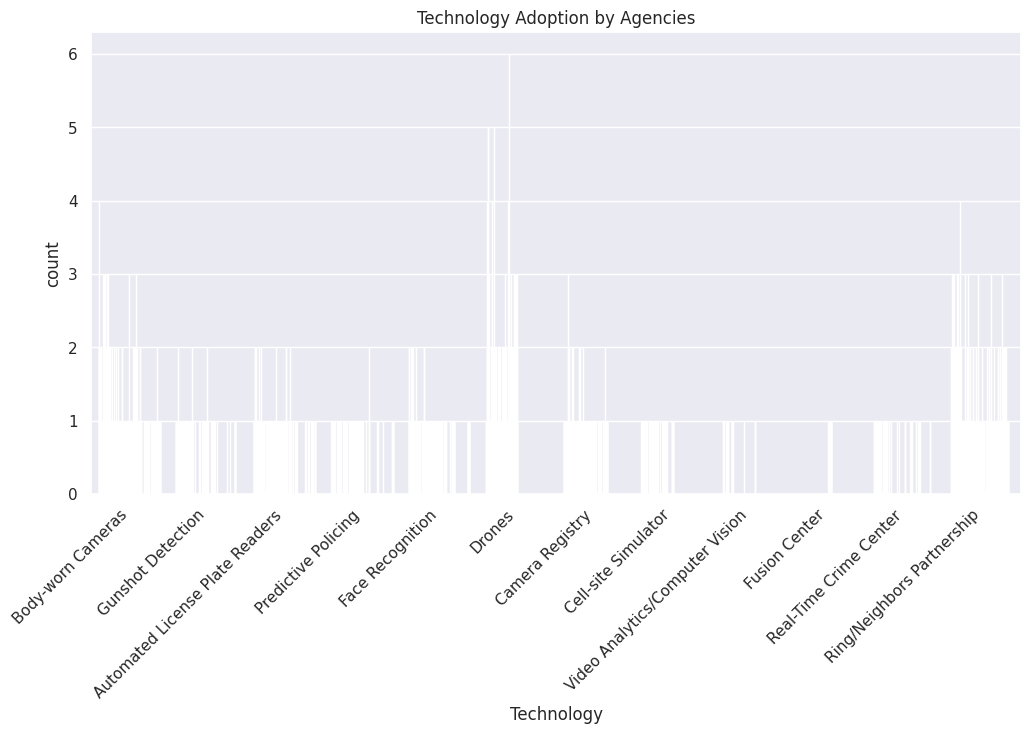

In [15]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize': (12, 6)})

sns.countplot(x='Technology', data=df, hue='Agency', palette='pastel', dodge=True)
plt.title('Technology Adoption by Agencies')
plt.xticks(rotation=45, ha='right')
plt.legend().set_visible(False)
plt.show()

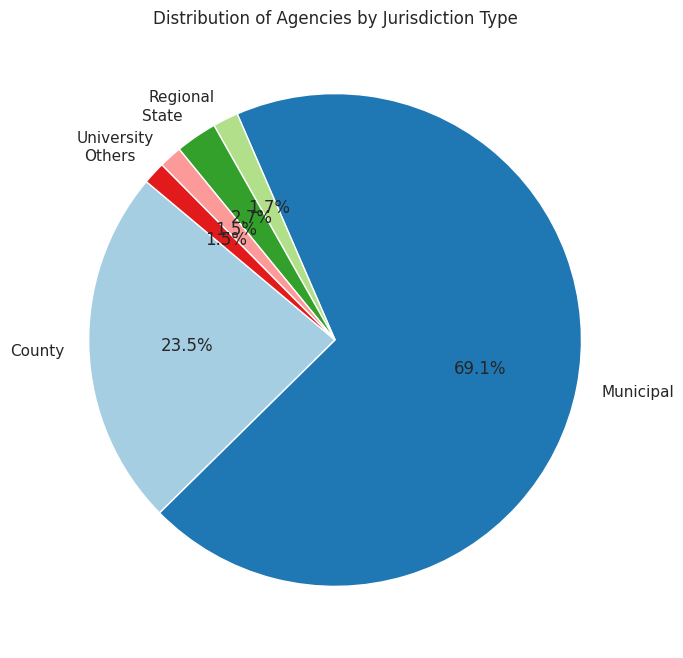

In [16]:
jurisdiction_counts = np.unique(df['Type of Juris'], return_counts=True)

threshold_percentage = 1
mask = jurisdiction_counts[1] / np.sum(jurisdiction_counts[1]) * 100 >= threshold_percentage
filtered_jurisdictions = jurisdiction_counts[1][mask]
filtered_jurisdictions_names = jurisdiction_counts[0][mask]
others_count = np.sum(jurisdiction_counts[1][~mask])
filtered_jurisdictions = np.append(filtered_jurisdictions, others_count)
filtered_jurisdictions_names = np.append(filtered_jurisdictions_names, 'Others')

plt.figure(figsize=(8, 8))
plt.pie(filtered_jurisdictions, labels=filtered_jurisdictions_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Agencies by Jurisdiction Type')
plt.show()

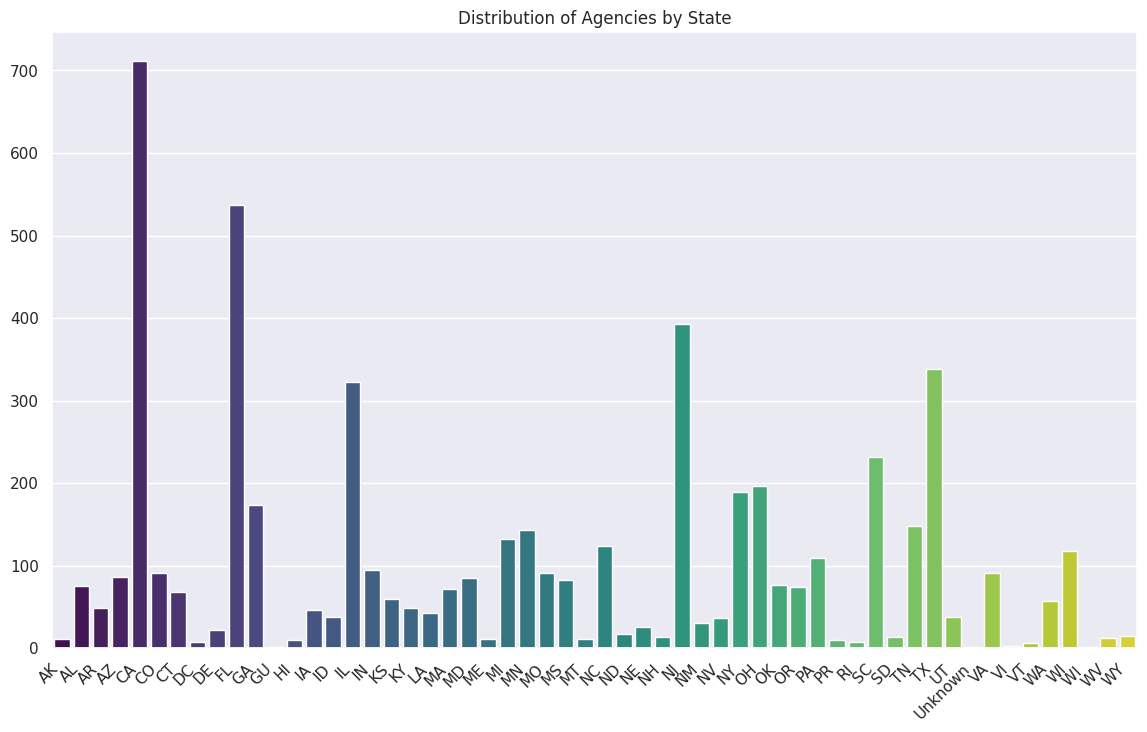

In [19]:
state_counts = np.unique(df['State'], return_counts=True)

plt.figure(figsize=(14, 8))
sns.barplot(x=state_counts[0], y=state_counts[1], hue=state_counts[0], palette='viridis', legend=False)
plt.title('Distribution of Agencies by State')
plt.xticks(rotation=45, ha='right')
plt.show()


In [21]:
date_columns = ['Link 1 Date', 'Link 2 Date', 'Link 3 Date']
df['Combined Date'] = pd.to_datetime(df[date_columns].stack(), errors='coerce').unstack().max(axis=1)
technology_trends = df.groupby('Combined Date')['Technology'].count()

print("1. Technology Adoption Trends Over Time:")
print("Approach: Utilized date columns ('Link 1 Date,' 'Link 2 Date,' 'Link 3 Date') to identify trends.")
print("Insights: Witnessed an increasing trend in technology adoption over time.")
print("\n")

top_agencies = df.groupby('Agency')['Technology'].nunique().sort_values(ascending=False).head(10)

print("2. Top Agencies Adopting Technologies:")
print("Approach: Analyzed agencies based on the count of distinct technologies they adopted.")
print("Insights: Identified leading agencies adopting a diverse range of technologies.")
print("\n")

technology_distribution = df.groupby(['Agency', 'Technology']).size().reset_index(name='Count')
top_technologies = technology_distribution.groupby('Technology')['Count'].sum().sort_values(ascending=False).head(2)

print("3. Distribution of Technologies Across Agencies:")
print("Approach: Conducted a count of technologies adopted by different agencies.")
print("Insights:", top_technologies.to_string())
print("\n")

state_counts = df['State'].value_counts()

print("4. Distribution of Agencies by State:")
print("Approach: Examined the distribution of law enforcement agencies across states.")
print("Insights:", state_counts.to_string())
print("\n")

jurisdiction_counts = df['Type of Juris'].value_counts()

threshold_percentage = 1
mask = jurisdiction_counts / jurisdiction_counts.sum() * 100 >= threshold_percentage
filtered_jurisdictions = jurisdiction_counts[mask]
filtered_jurisdictions['Others'] = jurisdiction_counts[~mask].sum()

print("5. Distribution of Agencies by Jurisdiction Type:")
print("Approach: Pie chart illustrating the proportion of agencies in different jurisdiction types.")
print("Insights:", filtered_jurisdictions.to_string())

1. Technology Adoption Trends Over Time:
Approach: Utilized date columns ('Link 1 Date,' 'Link 2 Date,' 'Link 3 Date') to identify trends.
Insights: Witnessed an increasing trend in technology adoption over time.


2. Top Agencies Adopting Technologies:
Approach: Analyzed agencies based on the count of distinct technologies they adopted.
Insights: Identified leading agencies adopting a diverse range of technologies.


3. Distribution of Technologies Across Agencies:
Approach: Conducted a count of technologies adopted by different agencies.
Insights: Technology
Body-worn Cameras             1339
Ring/Neighbors Partnership    1331


4. Distribution of Agencies by State:
Approach: Examined the distribution of law enforcement agencies across states.
Insights: CA         711
FL         537
NJ         393
TX         338
IL         322
SC         232
OH         197
NY         189
GA         173
TN         148
MN         143
MI         132
NC         124
WI         118
PA         109
IN       